In [65]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_theme(style='ticks', context='notebook')

# Ad-Hoc Scenario

In [66]:
from os import makedirs

CONSUMPTION_PER_JOB = 2036.6  # Watt
experiment = "ml"
#experiment = "batch"
result_dir = "results"
image_dir= "img"
makedirs(image_dir, exist_ok=True)

# LOAD BASELINE
with open(f"results/{experiment}_0_cal.csv", "r") as csvfile:
    cal0 = pd.read_csv(csvfile, index_col=0, parse_dates=True)
with open(f"results/{experiment}_0_ger.csv", "r") as csvfile:
    ger0 = pd.read_csv(csvfile, index_col=0, parse_dates=True)
with open(f"results/{experiment}_0_fr.csv", "r") as csvfile:
    fr0 = pd.read_csv(csvfile, index_col=0, parse_dates=True)
with open(f"results/{experiment}_0_gb.csv", "r") as csvfile:
    gb0 = pd.read_csv(csvfile, index_col=0, parse_dates=True)

cal0.head(100)

,active_jobs,ci,emissions
Time,,,
2020-01-01 00:00:00,0.0,342.092256,0.000000
2020-01-01 00:30:00,0.0,347.220539,0.000000
2020-01-01 01:00:00,0.0,344.967632,0.000000
2020-01-01 01:30:00,0.0,339.952418,0.000000
2020-01-01 02:00:00,0.0,336.563101,0.000000
...,...,...,...
2020-01-02 23:30:00,7.5,341.710450,2562.828373
2020-01-03 00:00:00,7.0,338.461078,2369.227549
2020-01-03 00:30:00,7.0,343.491331,2404.439320


In [67]:
# LOAD RESULTS
#base = "next_workday"
# base = "next_workday_0.05"
base = "weekend_0.05"
#base = "next_monday_thursday"
# base = "semi_weekly_0.05"
#base = "480_e"

with open(f"results/{experiment}_{base}_cal.csv", "r") as csvfile:
    calx = pd.read_csv(csvfile, index_col=0, parse_dates=True)
with open(f"results/{experiment}_{base}_i_cal.csv", "r") as csvfile:
    calxi = pd.read_csv(csvfile, index_col=0, parse_dates=True)
    
with open(f"results/{experiment}_{base}_ger.csv", "r") as csvfile:
    gerx = pd.read_csv(csvfile, index_col=0, parse_dates=True)
with open(f"results/{experiment}_{base}_i_ger.csv", "r") as csvfile:
    gerxi = pd.read_csv(csvfile, index_col=0, parse_dates=True)
    
with open(f"results/{experiment}_{base}_fr.csv", "r") as csvfile:
    frx = pd.read_csv(csvfile, index_col=0, parse_dates=True)
with open(f"results/{experiment}_{base}_i_fr.csv", "r") as csvfile:
    frxi = pd.read_csv(csvfile, index_col=0, parse_dates=True)
    
with open(f"results/{experiment}_{base}_gb.csv", "r") as csvfile:
    gbx = pd.read_csv(csvfile, index_col=0, parse_dates=True)
with open(f"results/{experiment}_{base}_i_gb.csv", "r") as csvfile:
    gbxi = pd.read_csv(csvfile, index_col=0, parse_dates=True)


In [68]:
calxi.head(100)

,active_jobs,ci,emissions
Time,,,
2020-01-01 00:00:00,0.00,342.092256,0.000000
2020-01-01 00:30:00,0.00,347.220539,0.000000
2020-01-01 01:00:00,0.00,344.967632,0.000000
2020-01-01 01:30:00,0.00,339.952418,0.000000
2020-01-01 02:00:00,0.00,336.563101,0.000000
...,...,...,...
2020-01-02 23:30:00,2.50,341.710450,854.276124
2020-01-03 00:00:00,2.50,338.461078,846.152696
2020-01-03 00:30:00,2.50,343.491331,858.728328


In [69]:
# tons of CO2

def ana(baseline, x, xi):
    e_b = baseline["emissions"].sum() / 2 / 1000000
    e_x = x["emissions"].sum() / 2 / 1000000
    e_xi = xi["emissions"].sum() / 2 / 1000000
    #print(e_b, e_x, e_xi)
    print(f"Non-interruptible: {1 - e_x/e_b:.2%}")
    print(f"Interruptible:     {1 - e_xi/e_b:.2%}")
    
for country, baseline, x, xi in [("Germany", ger0, gerx, gerxi), ("Great Britain", gb0, gbx, gbxi), ("France", fr0, frx, frxi), ("California", cal0, calx, calxi)]:
    print(country)
    ana(baseline, x, xi)

Germany
Non-interruptible: 13.87%
Interruptible:     17.77%
Great Britain
Non-interruptible: 13.83%
Interruptible:     18.38%
France
Non-interruptible: 10.63%
Interruptible:     12.59%
California
Non-interruptible: 5.93%
Interruptible:     14.94%


<AxesSubplot:xlabel='Time'>

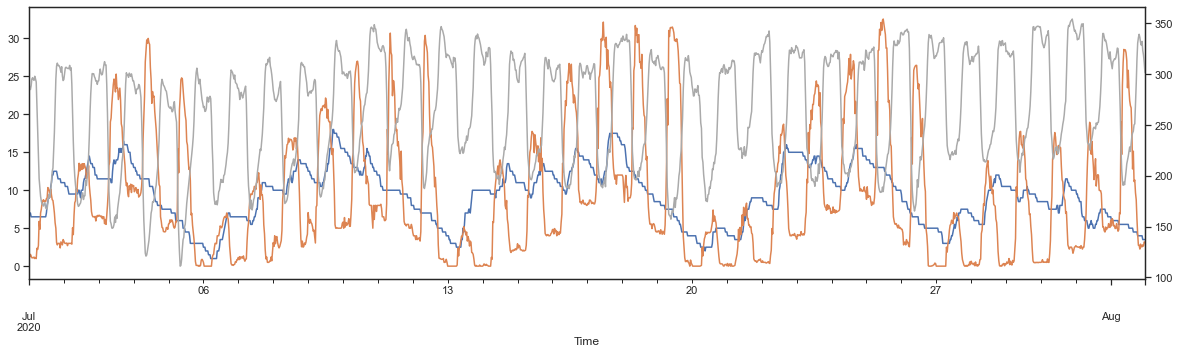

In [70]:
fig, ax1 = plt.subplots(figsize=(20, 5))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

cal0.loc["2020-07-01":"2020-08-01","active_jobs"].plot(ax=ax1)  # "2020-04-01":"2020-06-01",
calxi.loc["2020-07-01":"2020-08-01","active_jobs"].plot(ax=ax1)
cal0.loc["2020-07-01":"2020-08-01","ci"].plot(ax=ax2, color="#aaa")

<AxesSubplot:xlabel='Time'>

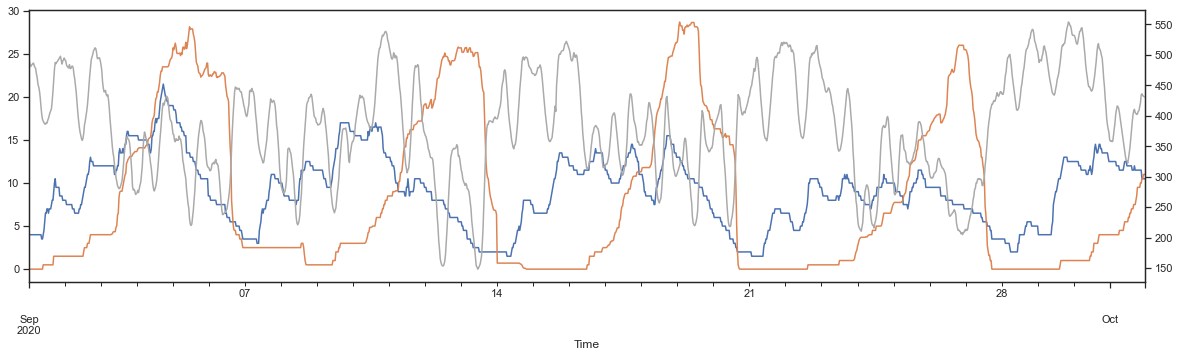

In [71]:
fig, ax1 = plt.subplots(figsize=(20, 5))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

start = "2020-09-01"
end = "2020-10-01"
ger0.loc[start:end,"active_jobs"].plot(ax=ax1)  # "2020-04-01":"2020-06-01",
gerx.loc[start:end,"active_jobs"].plot(ax=ax1)
ger0.loc[start:end,"ci"].plot(ax=ax2, color="#aaa")

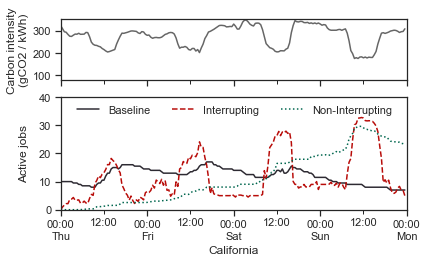

In [72]:
f, (ax1, ax2) = plt.subplots(nrows=2, gridspec_kw={"height_ratios": (.35, .65)}, sharex=True, figsize=(6.2, 3.5))
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

start = "2020-01-08" # Wednesday
stop = "2020-01-11"  # Saturday
cal0.loc[start:stop,"ci"].plot(ax=ax1, color="#666")
cal0.loc[start:stop,"active_jobs"].plot(ax=ax2, color="#2D2A32")  # "2020-04-01":"2020-06-01",
calxi.loc[start:stop,"active_jobs"].plot(ax=ax2, color="#B80C09", style="--")
calx.loc[start:stop,"active_jobs"].plot(ax=ax2, color="#00664E", style=":")

ax1.set(ylabel='Carbon intensity\n(gCO2 / kWh)')
ax2.set(ylabel='Active jobs')
ax2.set(xlabel='California')

ax2.set_xticks(["2020-01-08", "2020-01-09", "2020-01-10", "2020-01-11", "2020-01-12"])
ax2.set_xticks(["2020-01-08 12:00:00", "2020-01-09 12:00:00", "2020-01-10 12:00:00", "2020-01-11 12:00:00"], minor=True)
ax2.set_xticklabels(["00:00\nThu", "00:00\nFri", "00:00\nSat", "00:00\nSun", "00:00\nMon"])
ax2.set_xticklabels(["12:00"]*4, minor=True)
ax1.set_ylim(80, 350)
ax2.set_ylim(0, 40)

#handles, labels = ax1.get_legend_handles_labels()
#f.legend(handles, ["Carbon Intensity"], loc='upper left', bbox_to_anchor=(0.56, 1), frameon=False, ncol=1, markerfirst=False)

handles, labels = ax2.get_legend_handles_labels()
f.legend(handles, ["Baseline", "Interrupting", "Non-Interrupting"], loc='upper left', bbox_to_anchor=(0.14, 0.58), frameon=False, ncol=3)

f.align_ylabels()

plt.savefig(f"{image_dir}/ml_jobs.pdf", dpi=300, bbox_inches='tight')

<AxesSubplot:xlabel='Time'>

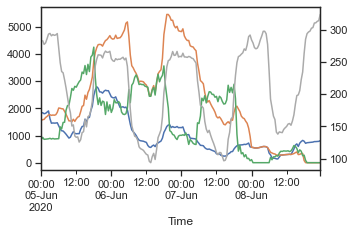

In [73]:
fig, ax1 = plt.subplots(figsize=(5, 3))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

cal0.loc["2020-06-05":"2020-06-08","emissions"].plot(ax=ax1)  # "2020-04-01":"2020-06-01",
calx.loc["2020-06-05":"2020-06-08","emissions"].plot(ax=ax1)
calxi.loc["2020-06-05":"2020-06-08","emissions"].plot(ax=ax1)
cal0.loc["2020-06-05":"2020-06-08","ci"].plot(ax=ax2, color="#aaa")

In [74]:
def load_all(country: str, scheduler: str, error=0.05):
    with open(f"results/ml_0_{country}.csv", "r") as csvfile:
        baseline = pd.read_csv(csvfile, index_col=0, parse_dates=True)
    with open(f"results/ml_{scheduler}_{error}_{country}.csv", "r") as csvfile:
        x = pd.read_csv(csvfile, index_col=0, parse_dates=True)
    with open(f"results/ml_{scheduler}_{error}_i_{country}.csv", "r") as csvfile:
        xi = pd.read_csv(csvfile, index_col=0, parse_dates=True)
    return baseline, x, xi

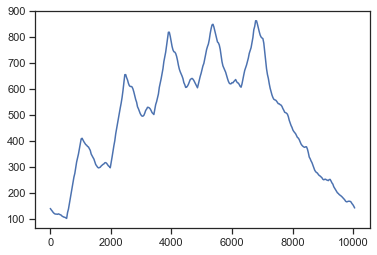

In [75]:
baseline, _, _ = load_all("fr", "next_workday")
x = baseline.groupby(baseline.index.day_of_week * 24 * 60 + baseline.index.hour * 60 + baseline.index.minute).mean()
plt.plot(x.index, x["emissions"])

In [76]:
def week_comparison(baseline, x, xi, scheduler, ax=None, field="emissions"):
    if ax is None:
        ax = plt.gca()
    if field == "emissions":  # Convert to g/h
        baseline = baseline
        x = x
        xi = xi
        
    b_w = baseline.groupby(baseline.index.day_of_week * 24 * 60 + baseline.index.hour * 60 + baseline.index.minute).mean()
    ax.plot(b_w.index, b_w["emissions"], label='Baseline', color="#2D2A32")
    xi_w = xi.groupby(xi.index.day_of_week * 24 * 60 + xi.index.hour * 60 + xi.index.minute).mean()
    ax.plot(xi_w.index, xi_w["emissions"], label='Interrupting', color="#B80C09", linestyle="--")
    x_w = x.groupby(x.index.day_of_week * 24 * 60 + x.index.hour * 60 + x.index.minute).mean()
    ax.plot(x_w.index, x_w["emissions"], label='Non-Interrupting', color="#00664E", linestyle=":")
    
    ax.set_xlim(0, 7 * 24 * 60)
    ax.set_ylabel("Emission rate\n(gCO/h)")
    
    if scheduler == "next_workday":
        ax.axvline(9*60, color="#666", linestyle="--")
        ax.axvline(9*60+1440, color="#666", linestyle="--")
        ax.axvline(9*60+1440*2, color="#666", linestyle="--")
        ax.axvline(9*60+1440*3, color="#666", linestyle="--")
        ax.axvline(9*60+1440*4, color="#666", linestyle="--")
    if scheduler == "next_monday_thursday":
        ax.axvline(9*60, color="#666", linestyle="--")
        ax.axvline(9*60+1440*3, color="#666", linestyle="--")
    
    ax.set_xticks([0, 1440, 2*1440, 3*1440, 4*1440, 5*1440, 6*1440, 7*1440])
    ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun", "Mon"])
    ax.legend().remove()

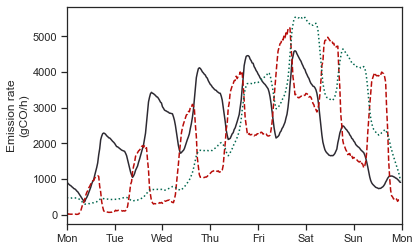

In [77]:
week_comparison(*load_all("cal", "weekend"), scheduler="weekend")

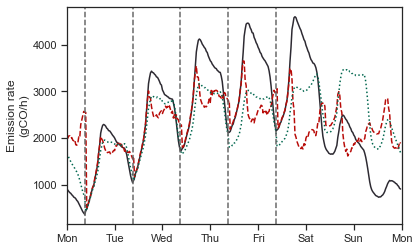

In [78]:
week_comparison(*load_all("cal", "next_workday"), scheduler="next_workday")

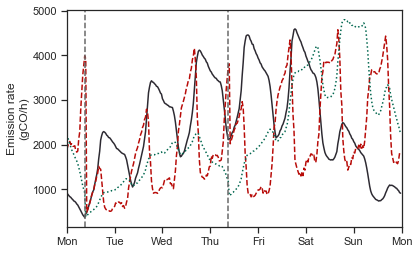

In [79]:
week_comparison(*load_all("cal", "semi_weekly"), scheduler="next_monday_thursday")

[<matplotlib.lines.Line2D object at 0x000001E5DF649A30>, <matplotlib.lines.Line2D object at 0x000001E5DF5FF1F0>, <matplotlib.lines.Line2D object at 0x000001E5DF649820>] ['Baseline', 'Interrupting', 'Non-Interrupting']


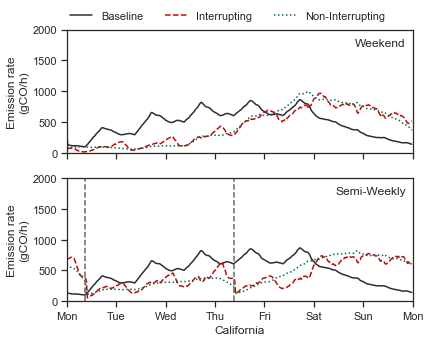

In [80]:
f, (ax2, ax3) = plt.subplots(nrows=2, gridspec_kw={"height_ratios": (.5, .5)}, sharex=True, figsize=(6.2, 5))

week_comparison(*load_all("fr", "weekend"), scheduler="weekend", ax=ax2)
week_comparison(*load_all("fr", "semi_weekly"), scheduler="next_monday_thursday", ax=ax3)

ax3.set(xlabel='California')

ax2.set_ylim(0, 2000)
ax3.set_ylim(0, 2000)

ax2.text(0.98, 0.89, "Weekend", ha="right", va="center", transform = ax2.transAxes)
ax3.text(0.98, 0.89, "Semi-Weekly", ha="right", va="center", transform = ax3.transAxes)

handles, labels = plt.gca().get_legend_handles_labels()
print(handles, labels)
f.legend(handles, ["Baseline", "Interrupting", "Non-Interrupting"], loc='upper left', bbox_to_anchor=(0.11, 0.96), frameon=False, ncol=3)

f.align_ylabels()

plt.savefig(f"{image_dir}/ml_constraints.pdf", dpi=300, bbox_inches='tight')

# Barplot

In [81]:
bardata0 = np.zeros((4,4))
bardata5 = np.zeros((4,4))
bardata10 = np.zeros((4,4))

def diff(baseline, x):
    e_b = baseline["emissions"].sum() / 2 / 1000000
    e_x = x["emissions"].sum() / 2 / 1000000
    return (1 - e_x/e_b) * 100

for ifs, forecasting_strategy in enumerate(["weekend", "semi_weekly"]):
    for ic, country, baseline in zip(range(4), ["ger", "cal", "gb", "fr"], [ger0, cal0, gb0, fr0]):
        for ii, interruptible in enumerate(["", "_i"]):
            with open(f"results/ml_{forecasting_strategy}{interruptible}_{country}.csv", "r") as csvfile:
                bardata0[ii+ifs*2][ic] = diff(baseline, pd.read_csv(csvfile, index_col=0, parse_dates=True))
            with open(f"results/ml_{forecasting_strategy}_0.05{interruptible}_{country}.csv", "r") as csvfile:
                bardata5[ii+ifs*2][ic] = diff(baseline, pd.read_csv(csvfile, index_col=0, parse_dates=True))
            with open(f"results/ml_{forecasting_strategy}_0.1{interruptible}_{country}.csv", "r") as csvfile:
                bardata10[ii+ifs*2][ic] = diff(baseline, pd.read_csv(csvfile, index_col=0, parse_dates=True))
    
((bardata0 / bardata5) - 1) * 100

array([[0.17778553, 0.55605858, 0.15595552, 0.35039017],
       [2.09433935, 2.10017678, 1.70411776, 3.8128508 ],
       [0.22350603, 0.61335193, 0.18657095, 0.47151837],
       [2.33828987, 3.27075133, 1.82287684, 4.10090934]])

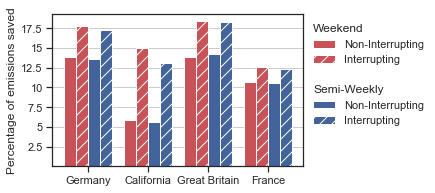

In [82]:
# set width of bars
barWidth = 0.2

bardata = bardata5
# set heights of bars
nextw = bardata[0]
nextw_i = bardata[1]
nextmt = bardata[2]
nextmt_i = bardata[3]
 
# Set position of bar on X axis
r1 = np.arange(len(bardata))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r1, nextw, color='#C75359', width=barWidth, edgecolor='white', label='Non-Interrupting')
plt.bar(r2, nextw_i, color='#C75359', width=barWidth, edgecolor='white', hatch="//", label='Interrupting')
plt.bar(r3, nextmt, color='#42649A', width=barWidth, edgecolor='white', label='Non-Interrupting')
plt.bar(r4, nextmt_i, color='#42649A', width=barWidth, edgecolor='white', hatch="//", label='Interrupting')
 
# Add xticks on the middle of the group bars
#plt.xlabel('group', fontweight='bold')
plt.xticks([r + 1.5*barWidth for r in range(len(bardata))], ['Germany', 'California', 'Great Britain', 'France'])
plt.ylabel("Percentage of emissions saved")

plt.yticks([2.5, 5, 7.5, 10, 12.5, 15, 17.5], ["2.5", "5", "7.5", "10", "12.5", "15", "17.5"])
#plt.yticks([2.5], [""], minor=True)
 
# Create legend & Show graphic
#plt.legend(loc='upper left', bbox_to_anchor=(0, 1.35), frameon=False)
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
#leg1 = plt.legend(handles=handles[:2], labels=labels[:2], title="Next Workday", loc='upper right', bbox_to_anchor=(1.39, 1), frameon=False)
leg1 = plt.legend(handles=handles[:2], labels=labels[:2], title="Weekend", loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
leg1._legend_box.align = "left"
#leg2 = plt.legend(handles=handles[2:], labels=labels[2:], title="Next Mon/Thu", loc='upper right', bbox_to_anchor=(1.39, 0.75), frameon=False)
leg2 = plt.legend(handles=handles[2:], labels=labels[2:], title="Semi-Weekly", loc='upper left', bbox_to_anchor=(1, 0.6), frameon=False)
leg2._legend_box.align = "left"
ax.add_artist(leg1)
ax.grid(axis='y')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(4.5, 2.8)

plt.savefig("img/ml_results.pdf", dpi=300, bbox_inches='tight')

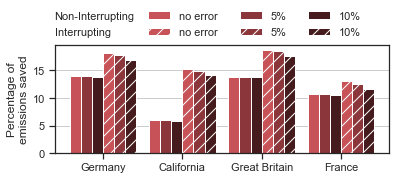

In [85]:
# set width of bars
barWidth = 0.14

bardata = bardata5
# set heights of bars
nextw0 = bardata0[0]
nextw0_i = bardata0[1]
nextw5 = bardata5[0]
nextw5_i = bardata5[1]
nextw10 = bardata10[0]
nextw10_i = bardata10[1]
 
# Set position of bar on X axis
r1 = np.arange(len(bardata))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
 
# Make the plot
plt.bar(r1, nextw0, color='#C75359', width=barWidth, edgecolor='white', label='no error')
plt.bar(r2, nextw5, color='#8B363A', width=barWidth, edgecolor='white', label='5%')
plt.bar(r3, nextw10, color='#451b1d', width=barWidth, edgecolor='white', label='10%')
plt.bar(r4, nextw0_i, color='#C75359', width=barWidth, edgecolor='white', hatch="//", label='no error')
plt.bar(r5, nextw5_i, color='#8B363A', width=barWidth, edgecolor='white', hatch="//", label='5%')
plt.bar(r6, nextw10_i, color='#451b1d', width=barWidth, edgecolor='white', hatch="//", label='10%')
 
# Add xticks on the middle of the group bars
plt.xticks([r + 2.5*barWidth for r in range(len(bardata))], ['Germany', 'California', 'Great Britain', 'France'])
plt.ylabel("Percentage of\nemissions saved")
 
# Create legend & Show graphic
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()

plt.text(0, 1.26, "Non-Interrupting",
     horizontalalignment='left',
     verticalalignment='center',
         fontsize=11,
     transform = ax.transAxes)
plt.text(0, 1.11, "Interrupting",
     horizontalalignment='left',
     verticalalignment='center',
         fontsize=11,
     transform = ax.transAxes)

#leg1 = plt.legend(handles=handles[:2], labels=labels[:2], title="Next Workday", loc='upper right', bbox_to_anchor=(1.39, 1), frameon=False)
leg1 = plt.legend(handles=handles[:3], labels=labels[:3], loc='upper left', bbox_to_anchor=(0.25, 1.4), frameon=False, ncol=3)
leg1._legend_box.align = "left"
#leg2 = plt.legend(handles=handles[2:], labels=labels[2:], title="Next Mon/Thu", loc='upper right', bbox_to_anchor=(1.39, 0.75), frameon=False)
leg2 = plt.legend(handles=handles[3:], labels=labels[3:], loc='upper left', bbox_to_anchor=(0.25, 1.25), frameon=False, ncol=3)
leg2._legend_box.align = "left"
ax.add_artist(leg1)
ax.grid(axis='y')



fig = matplotlib.pyplot.gcf()
fig.set_size_inches(6, 2)

plt.savefig(f"{image_dir}/errors.pdf", dpi=300, bbox_inches='tight')